# Trabalho Final - Não Supervisionado

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico

### Dataset - Credit Card Fraud Detection
**Link**:<br> https://www.kaggle.com/mlg-ulb/creditcardfraud

**Contexto**: <br>
É de extrema importância que as empresas identifiquem e reconheçam transações fraudulentas com cartão de crédito, para que os cliente não sejam cobrados pelos itens que não compraram e, as empresas não tomem prejuízo devido a fraude.

**Conteúdo**:<br>
O dataset contêm transações realizadas com cartões de crédito em setembro de 2013 por portadores de cartões europeus. Este conjunto de dados apresenta transações que ocorreram em dois dias, nas quais temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) representa 0,172% de todas as transações.<br>

O dataset contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a problemas de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Features de V1, V2, até V28 são os principais componentes obtidos com o PCA, os únicos recursos que não foram transformados com o PCA são 'Tempo' e 'Valor'. O recurso 'Hora' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Valor' é o valor da transação, esse recurso pode ser usado para aprendizado sensível a custos dependente de exemplo. O recurso 'Classe' é a variável de resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.

**Resolução**: <br>
Para resolução do problema, utilizaremos algoritmos de aprendizagem supervisionada. Como o dataset é desbalanceado, mostraremos uma solução de balanceamento. 

## 1. Carregando Bibliotecas

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, classification_report, f1_score, precision_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

## 2. Carregando dados

- Foi feito o donwload dos dados e inseridos no diretório ```/dataset```;
- Utilizamos a biblioteca Pandas para carregar o dataset.

In [2]:
dataset = pd.read_csv("dataset/creditcard.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**ANÁLISE**:
- Dataset não possui valores NaN;
- 28 colunas resultantes da técnica de redução de dimensionalidade PCA;
- 1 coluna referente ao valor da transação;
- Class é a coluna target;
- Todos os dados presentes no dataset são dados numéricos.

In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**ANÁLISE**:
- Dataset apresenta grande quantidade de outliers na maioria das colunas

## 3. Exploração dos dados

In [5]:
print("Divisão dos dados:")
print(f"Não Fraudulenta: {round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2)}%.")
print(f"Fraudulenta: {round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2)}%.")

Divisão dos dados:
Não Fraudulenta: 99.83%.
Fraudulenta: 0.17%.


**ANÁLISE**:
- O dataset é originalmente desbalanceado. A maior parte dos dados são representados por transações não fraudulentas. É necessário aplicar técnicas para rebalancear os dados (dados de treinamento).
- Quando os dados são desbalanceados, temos que utilizar métricas como Recall, Precision e F1-Score para análisar o desempenho do algoritmo.

### 3.1. Distribuição dos Dados

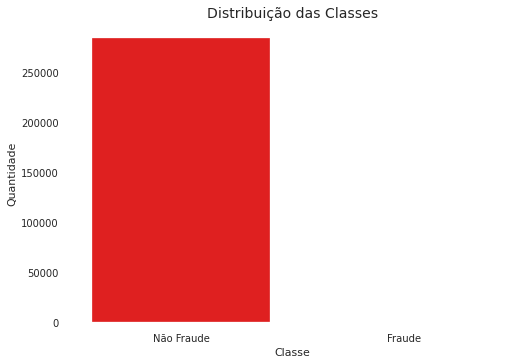

In [6]:
labels = ['Não Fraude', 'Fraude']
sns.countplot('Class', data = dataset, palette = ['red','blue'])
plt.title('Distribuição das Classes', fontsize=14)
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Quantidade");

### 3.2. Existe diferência nos valores das transações fraudulentas e não fraudulentas?

In [7]:
fraude = dataset[dataset['Class'] == 1]['Amount']
n_fraude= dataset[dataset['Class'] == 0]['Amount']

In [8]:
print(f"Fraude:\n{fraude.describe()}\n")
print(f"Não Fraude:\n{n_fraude.describe()}")

Fraude:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Não Fraude:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


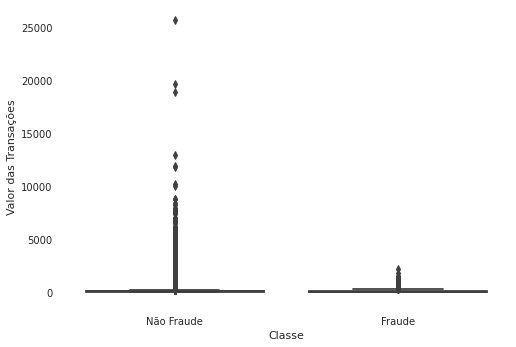

In [9]:
labels = ['Não Fraude', 'Fraude']
sns.boxplot(x = dataset['Class'], y = dataset['Amount'])
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Valor das Transações");

**ANÁLISE**:
- As transações não fraudulentas possui um range de valores muito maior.

### 3.3. Distribuição das Transações

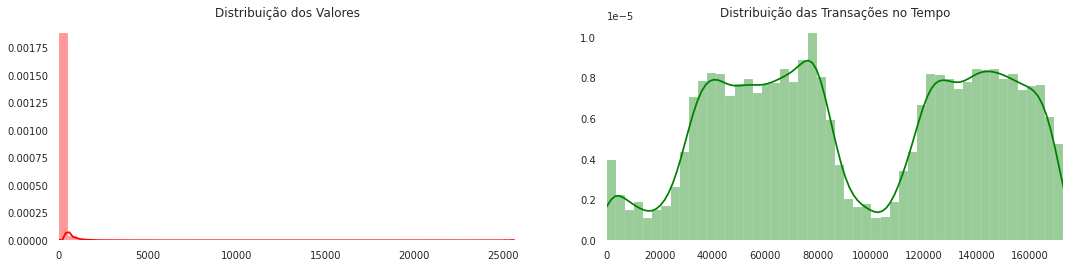

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (18,4))

valores = dataset['Amount'].values
tempo = dataset['Time'].values

sns.distplot(valores, ax = ax[0], color = 'red')
ax[0].set_title('Distribuição dos Valores', fontsize = 12)
ax[0].set_xlim([min(valores), max(valores)])

sns.distplot(tempo, ax = ax[1], color = 'green')
ax[1].set_title('Distribuição das Transações no Tempo', fontsize = 12)
ax[1].set_xlim([min(tempo), max(tempo)])

plt.show()

In [11]:
profile = ProfileReport(dataset, title="Pandas Profiling", minimal=True)
profile.to_notebook_iframe()

### 3.4. Correlação entre as variáveis

- Primeiramente, correlação não implica causalidade.

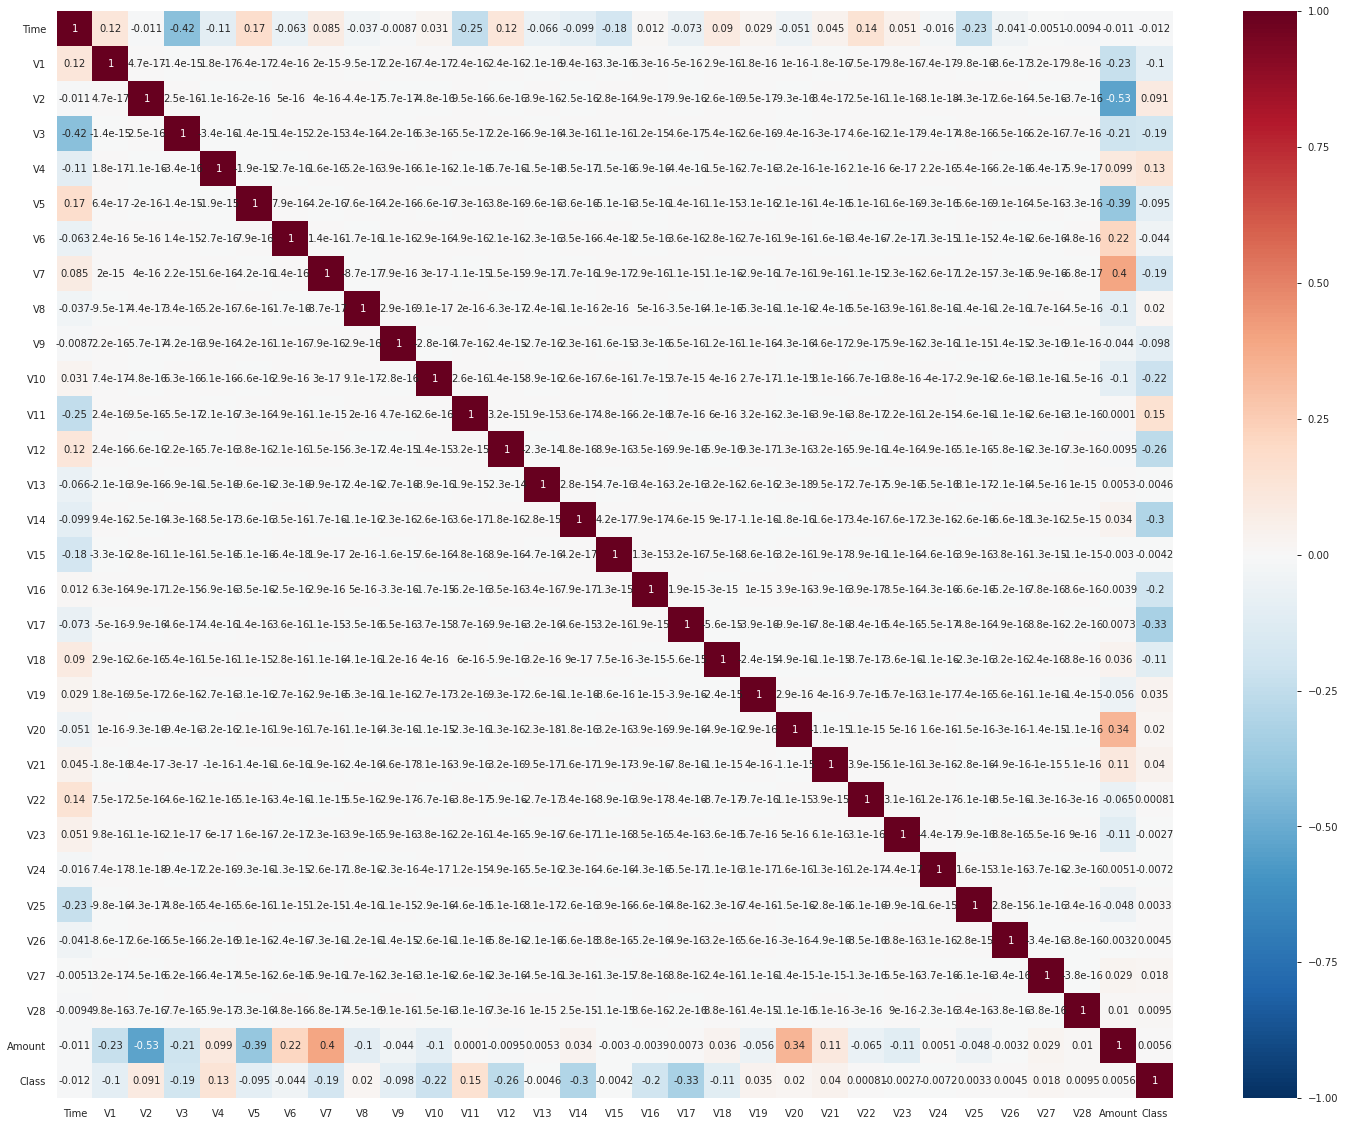

In [12]:
plt.figure(figsize=(25, 20))
heat_map = sns.heatmap(dataset.corr(),annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show(heat_map)

### 3.5. Features mais importantes

- Para analisar as features mais relevantes para detecção de Fraude, utilizamos dois algoritmos do método Ensemble para extrair as features.

#### 3.5.1. Separando feature e target.

In [13]:
x = dataset.drop(columns='Class')
y = dataset['Class']

#### 3.5.2. Padronizando as features para analisar a importância real.

In [14]:
scaler = StandardScaler()
min_max = MinMaxScaler()

In [16]:
x['Amount'] = scaler.fit_transform(dataset[['Amount']])
x['Time'] = min_max.fit_transform(dataset[['Time']])

#### 3.5.3. Criando os Algoritmos para Feature Importance

In [17]:
random_forest_features = RandomForestClassifier(n_estimators=100, max_depth=15)
tree_features = DecisionTreeClassifier()

#### 3.5.4. Treinando os Algoritmos

In [18]:
random_forest_features.fit(x, y)
tree_features.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 3.5.5. Ordenando as features mais importantes

In [19]:
random_forest_features_imp = pd.Series(random_forest_features.feature_importances_,
                                       index = dataset.columns[:-1])
random_forest_features_imp_order = random_forest_features_imp.sort_values()

tree_features_imp = pd.Series(tree_features.feature_importances_,
                              index = dataset.columns[:-1])
tree_features_imp_order = tree_features_imp.sort_values()

#### 3.5.6 Visualizando resultados das features mais importantes

No handles with labels found to put in legend.
No handles with labels found to put in legend.


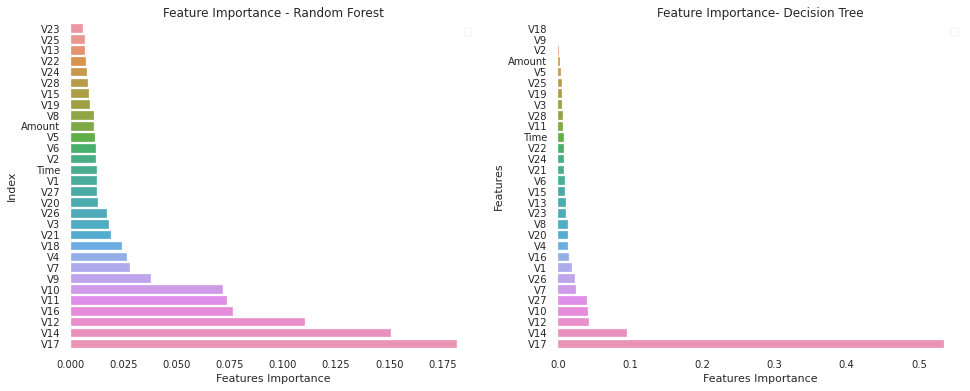

In [20]:
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
sns.barplot(x=random_forest_features_imp_order, y = random_forest_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Index")
plt.title("Feature Importance - Random Forest")
plt.legend()
plt.subplot(1,2,2)
sns.barplot(x=tree_features_imp_order, y = tree_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Features")
plt.title("Feature Importance- Decision Tree")
plt.legend()
plt.show()

**ANÁLISE**:
- Para o algoritmo Random Forest, as features mais importantes foram:
    1. V23;
    2. V24;
    3. V13;
    4. V25;
    5. V19.
    
    
- Para o algoritmo Decision Tree, as features mais importantes foram:
    1. V2;
    2. V3;
    3. V9;
    4. V18;
    5. V25.
    
Entre os dois algoritmos, tivemos pouca divergência. Entretando, considerei o resultado das features mais importantes do algoritmo **Random Forest**, pois obteve considera uma maior quantidade de variáveis para tomada de decisão.

## 4. Processamento dos dados

### 4.1. Removendo as features com menor relevância

In [21]:
list_features = []
for k, v in random_forest_features_imp_order[:5].items():
    list_features.append(k)
    
print(f'Features com menor importância: {list_features}')

Features com menor importância: ['V23', 'V25', 'V13', 'V22', 'V24']


In [22]:
df = dataset.drop(columns=list_features)

### 4.2. Aplicando padronização e normalização nos dados com larga escala

In [23]:
scaler = StandardScaler()
min_max = MinMaxScaler()

In [24]:
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = min_max.fit_transform(df[['Time']])

## 5. SMOTE Oversampling & Machine Learning¶

- Aplicando a técnica de SMOTE Oversampling para rebalancear o dataset;
- Como o dataset é muito desbalanceado, o modelo se torna enviesado para a classe (não fraudulenta) que tem a maior quantidade de dados;
- Dessa forma, aplico a técnica de oversampling nos dados de treino, sem manipular os dados de teste:
    - Isso faz com que o treinamento do modelo seja com duas classes balanceadas, fazendo com que o modelo não fique enviesado;
    - Os dados de testes seguem os dados originais desbalanceados.


### 5.1. Separando dados de treino e teste

In [25]:
X = df.drop(columns='Class')
y = df['Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sm = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

**ANÁLISE**:
- Aplicamos a técnica de rebalanceamento do dataset apenas nos dados de treino;
- Não aplicamos a técnica nos dados de teste pois diverge da realidade;
- Aplicar a técnica nos dados de treino é ideal para não termos um modelo enviesado.

### 5.2. Comparando a distribuição das classes dos dados de treino

#### 5.2.1. Dados de treino desbalanceados

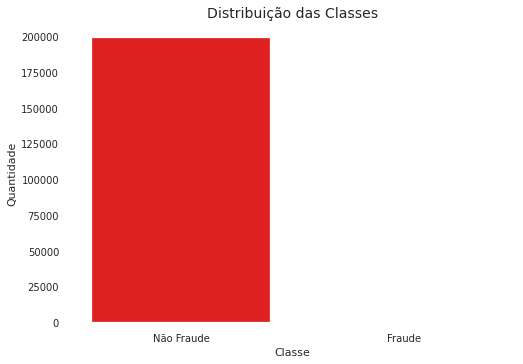

In [27]:
labels = ['Não Fraude', 'Fraude']
sns.countplot(y_train, palette = ['red','blue'])
plt.title('Distribuição das Classes', fontsize=14)
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Quantidade");

#### 5.2.2. Dados de treino balanceados

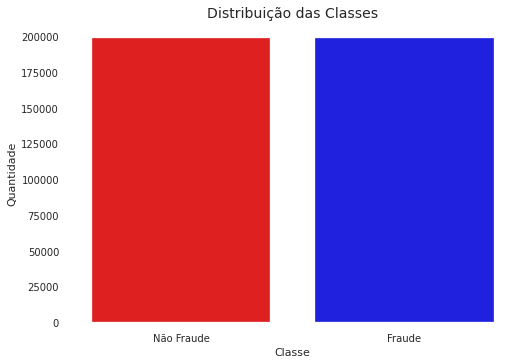

In [28]:
labels = ['Não Fraude', 'Fraude']
sns.countplot(y_train_smote, palette = ['red','blue'])
plt.title('Distribuição das Classes', fontsize=14)
plt.xticks(range(2), labels)
plt.xlabel("Classe")
plt.ylabel("Quantidade");

## 6. ITS TIME!! Machine Learning

### 6.1. Comparando acurácia de 7 modelos de classificação utilizando validação cruzada
- Será selecionado 4 modelos para tunning de hiperparâmetros;
- Posteriormente, será selecionado o modelo que obter as melhores métricas.



In [ ]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

modelos = []
modelos.append(("Logistic Regression", LogisticRegression()))
modelos.append(('Naive Bayes', GaussianNB()))
modelos.append(("Decision Tree", DecisionTreeClassifier()))
modelos.append(("Random Forest", RandomForestClassifier()))
modelos.append(("XGB Classifier", XGBClassifier()))
modelos.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
modelos.append(('SVM', SVC()))



# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle = True)
    cv_results = cross_val_score(modelo, X_train_smote, y_train_smote, cv = kfold, scoring = 'f1')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.942807 (0.001178)
Naive Bayes: 0.901126 (0.001024)
Decision Tree: 0.997622 (0.000329)


**ANÁLISE**:
    - Selecionei os seguintes modelos:
        - Gradient Boosting Classifier;
        - Random Forest;
        - XGB Classifier;
        - Logistic Regression.



### 6.2. Aplicando GridSearch para tunning e Validando com os dados de teste
- A métrica escolhida para otimizar os hiperparâmetros foi a ROC AUC, tendo em vista que o dataset é desbalanceado.
- Logo, a métrica escolhida para selecionar o melhor modelo foi a ROC AUC, pelo fato do dataset ser desbalanceado.



#### 6.2.1. Logistic Regression

In [30]:
# parâmetros da LogisticRegression
grid_rl = {"C":[10, 25],
           "penalty" : ["l1", "l2"]}
# Criando modelo
logistic = LogisticRegression()
# Aplicando GridSearchCV
clf_lr = GridSearchCV(logistic, param_grid = grid_rl, cv=3, scoring = 'roc_auc', verbose=0)
# Treinando modelo
clf_lr.fit(X_train_smote, y_train_smote)
# Fazendo predições
y_pred_logistic = clf_lr.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_logistic))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_logistic))
print("------------------------------------------------------")
print("LogisticRegression roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_logistic)))

/home/matheuspalhares/anaconda3/envs/iesb/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/matheuspalhares/anaconda3/envs/iesb/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/home/matheuspalhares/anaconda3/envs/iesb/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' pe

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

------------------------------------------------------
[[83021  2286]
 [   10   126]]
------------------------------------------------------
LogisticRegression roc_auc_score: 0.9498366281230628


In [60]:
print(f'Melhores parâmetros para o algorítmo Logistic Regression: {clf_lr.best_params_}')

Melhores parâmetros para o algorítmo Logistic Regression: {'C': 25, 'penalty': 'l2'}


#### 6.2.2 Gradient Boosting Classifier

In [31]:
# parâmetros da GradientBoostingClassifier
grid_gbc = {
    "learning_rate": [0.01, 0.15],
    "max_depth":[15, 25],
    "n_estimators":[100, 200]
    }
# Criando modelo
GBC = GradientBoostingClassifier()
# Aplicando GridSearchCV
clf_gbc = GridSearchCV(GBC, param_grid = grid_gbc, cv=3, scoring = 'roc_auc', verbose=0, n_jobs=-1)
# Treinando modelo
clf_gbc.fit(X_train_smote, y_train_smote)
# Fazendo predições
y_pred_gbc = clf_gbc.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_gbc))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_gbc))
print("------------------------------------------------------")
print("GradientBoostingClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_gbc)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.54      0.90      0.67       136

    accuracy                           1.00     85443
   macro avg       0.77      0.95      0.83     85443
weighted avg       1.00      1.00      1.00     85443

------------------------------------------------------
[[85201   106]
 [   14   122]]
------------------------------------------------------
GradientBoostingClassifier roc_auc_score: 0.9479081262898913


In [58]:
print(f'Melhores parâmetros para o algorítmo Gradient Boosting: {clf_gbc.best_params_}')

Melhores parâmetros para o algorítmo Gradient Boosting: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 100, 'subsample': 1.0}


#### 6.2.3. XGB Classifier

In [32]:
# parâmetros do XGBClassifier
grid_xgbc = { 'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.15],
              'max_depth': [15, 25]}
# Criando o modelo
xgb = XGBClassifier()
# Aplicando GridSearchCV
clf_xgb = GridSearchCV(xgb, param_grid= grid_xgbc, cv=3,  scoring = 'roc_auc', n_jobs = -1)
# Treinando modelo
clf_xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = clf_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_xgb))
print("------------------------------------------------------")
print("XGBClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_xgb)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.87      0.78       136

    accuracy                           1.00     85443
   macro avg       0.86      0.93      0.89     85443
weighted avg       1.00      1.00      1.00     85443

------------------------------------------------------
[[85259    48]
 [   18   118]]
------------------------------------------------------
XGBClassifier roc_auc_score: 0.9335421925929808


In [57]:
print(f'Melhores parâmetros para o algorítmo XGB: {clf_xgb.best_params_}')

Melhores parâmetros para o algorítmo XGB: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 500}


#### 6.2.4 Random Forest Classifier

In [33]:
# parâmetros da Random Forest
grid_rf = {
    "n_estimators" : [100, 200],
    "max_depth": [15, 25],
    "max_features": ['auto']
    }

# Criando modelo
rf = RandomForestClassifier()
# Aplicando GridSearchCV
clf_rf = GridSearchCV(rf, param_grid = grid_rf, cv=3, scoring = 'roc_auc', n_jobs = -1)
# Treinando modelo
clf_rf.fit(X_train_smote, y_train_smote)
# Fazendo predições
y_pred_rf = clf_rf.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_rf))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_rf))
print("------------------------------------------------------")
print("RandomForestClassifier roc_auc_score: {}".format(roc_auc_score(y_test, y_pred_rf)))

/home/matheuspalhares/anaconda3/envs/iesb/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.88      0.83       136

    accuracy                           1.00     85443
   macro avg       0.89      0.94      0.91     85443
weighted avg       1.00      1.00      1.00     85443

------------------------------------------------------


NameError: name 'y_test_res' is not defined

In [51]:
print(confusion_matrix(y_test, y_pred_rf))


[[85273    34]
 [   16   120]]


In [55]:
print(f'Melhores parâmetros para o algorítmo Random Forest: {clf_rf.best_params_}')

Melhores parâmetros para o algorítmo Random Forest: {'max_depth': 25, 'max_features': 'auto', 'n_estimators': 100}


## 7. Métricas

### 7.1. ROC AUC

In [48]:
print("Métrica ROC AUC:\n\
Logistic Regression: {}\n\
Gradient Boosting Classifier: {}\n\
XGB Classifier: {}\n\
Random Forest Classifier: {}".format(roc_auc_score(y_test, y_pred_logistic),
                                     roc_auc_score(y_test, y_pred_gbc),
                                     roc_auc_score(y_test, y_pred_xgb),
                                     roc_auc_score(y_test, y_pred_rf)))

Métrica ROC AUC:
Logistic Regression: 0.9498366281230628
Gradient Boosting Classifier: 0.9479081262898913
XGB Classifier: 0.9335421925929808
Random Forest Classifier: 0.9409771903415967


**ANÁLISE**:
- Os quatro algoritmos tiverem resultados muito próximo.
- Dessa forma, não podemos selecionar nenhum algoritmo utilizando métrica ROC AUC.

### 7.2. Precision

In [44]:
print("Métrica Precisão (Precision):\n\
Logistic Regression: {}\n\
Gradient Boosting Classifier: {}\n\
XGB Classifier: {}\n\
Random Forest Classifier: {}".format(precision_score(y_test, y_pred_logistic),
                                     precision_score(y_test, y_pred_gbc),
                                     precision_score(y_test, y_pred_xgb),
                                     precision_score(y_test, y_pred_rf)))

Métrica Precisão (Precision):
Logistic Regression: 0.05223880597014925
Gradient Boosting Classifier: 0.5350877192982456
XGB Classifier: 0.7108433734939759
Random Forest Classifier: 0.7792207792207793


**ANÁLISE**:
- O algorítmo Random Forest teve uma performace superior aos demais algorítmos analisando a métrica de Precisão.

### 7.3. Recall

In [46]:
print("Métrica Revocação (Recall):\n\
Logistic Regression: {}\n\
Gradient Boosting Classifier: {}\n\
XGB Classifier: {}\n\
Random Forest Classifier: {}".format(recall_score(y_test, y_pred_logistic),
                                     recall_score(y_test, y_pred_gbc),
                                     recall_score(y_test, y_pred_xgb),
                                     recall_score(y_test, y_pred_rf)))

Métrica Revocação (Revocação):
Logistic Regression: 0.9264705882352942
Gradient Boosting Classifier: 0.8970588235294118
XGB Classifier: 0.8676470588235294
Random Forest Classifier: 0.8823529411764706


**ANÁLISE**:
- O algorítmo de Regressão Logística obteve um melhor desempenho comparado aos algorítmos que utilizam métodos Ensemble;
- Entretanto, a diferênca é inferior a 4%.

### 7.4. F1-Score

In [47]:
print("Métrica F1-Score :\n\
Logistic Regression: {}\n\
Gradient Boosting Classifier: {}\n\
XGB Classifier: {}\n\
Random Forest Classifier: {}".format(f1_score(y_test, y_pred_logistic),
                                     f1_score(y_test, y_pred_gbc),
                                     f1_score(y_test, y_pred_xgb),
                                     f1_score(y_test, y_pred_rf)))

Métrica F1-Score :
Logistic Regression: 0.0989010989010989
Gradient Boosting Classifier: 0.6703296703296703
XGB Classifier: 0.7814569536423841
Random Forest Classifier: 0.8275862068965517


**ANÁLISE**:
- O algorítmo Random Forest obteve o melhor desempenho analisando a métrica F1-Score.
- A métrica F1-Score é uma das mais importante quando temos um dataset desbalanceado.

## 8. Matriz de Confusão
- Vamos analisar a matriz de confusão do algoritmo que obteve melhor desempenho.

Text(0.5, 56.5, 'Classe Predita')

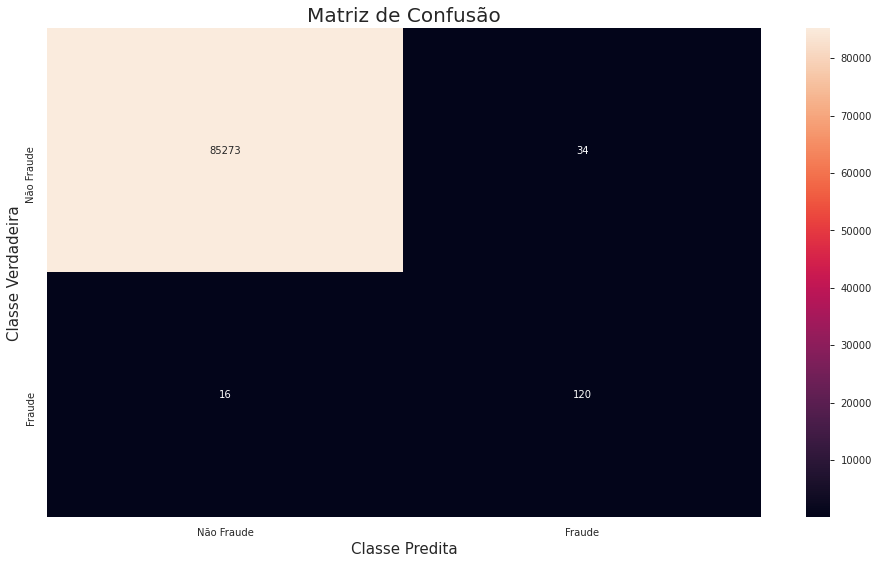

In [53]:
labels = ['Não Fraude', 'Fraude']
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
ax.set_title("Matriz de Confusão", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

# CONCLUSÃO

**ANÁLISE**:
- Após aplicar algorítmos de Aprendizagem Supervisionada (Regressão Logística e Métodos Ensemble), podemos concluir que os métodos Ensemble são indicados para casos que temos dados desbalanceados. No problema apresentado, detecção de fraude utilizando cartão de crédito, o algorítmo Random Forest obteve melhor performace analisando a métrica de F1-Score.
- Comparando o desempenho com o algorítmo de Aprendizado Não-Supervisionado, Auto Encoder, obtivemos melhor desempenho utilizando algorítmo de Aprendizagem Supervisionado.
- Os algorítmos de Aprendizagem Não-Supervionada são indicados para os casos que não temos os rótulos das transações Fraudulentas, pois obtemos um bom desempenho utilizando o Auto Encoder, minimizando o Falso Negativo.
- algorítmos de Aprendizagem Supervisionada apresentam um desempenho superior, pelo fator de aprender o que são transações fraudulentas além das transações não fraudulentas. Entretanto é necessário aplicar técnicas de balanceamentos dos dados de Treino para que o modelo não fica viesado.